In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
columns = ['Name', 'Ticket']
df.drop(columns=columns, inplace=True)

In [8]:
# quick EDA
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df.fillna({'Embarked' :'S'}, inplace=True)

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# prepared data
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


## Basic knn

In [14]:
X = df.drop(columns=['Survived'])
y = df.Survived

X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked']) # onehot encode

In [15]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1


In [16]:
from sklearn.neighbors import KNeighborsClassifier 

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.score(X, y)

0.8787878787878788

## KNN with dataset splitting

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, stratify=y, random_state=42) 

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(871, 11)
(20, 11)
(871,)
(20,)


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.score(X_test, y_test), knn.score(X_train, y_train)

(0.75, 0.9035591274397244)

## k-fold cross validation

In [29]:
from luwiji.knn import illustration, demo

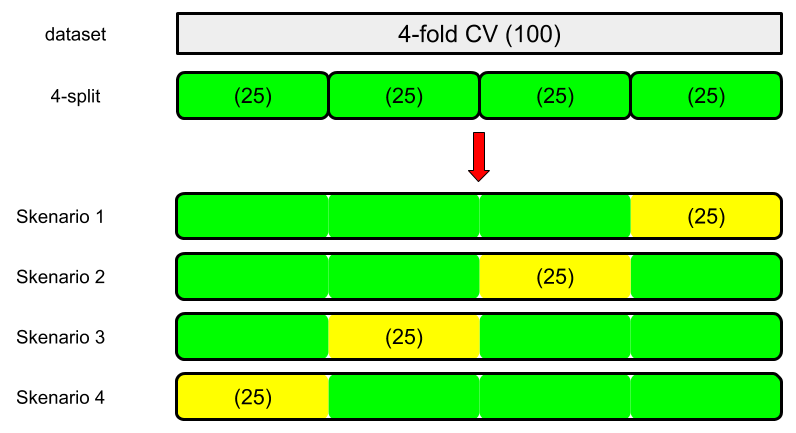

In [30]:
illustration.kfold_cv

In [31]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=5)

array([0.63687151, 0.63483146, 0.80337079, 0.73033708, 0.71348315])

In [32]:
cross_val_score(knn, X, y, cv=5).mean()

0.703778796058

## improve melalui data 

In [33]:
# fitur scaling
from sklearn.preprocessing import MinMaxScaler
scaller = MinMaxScaler()
scaller.fit(X_train)

MinMaxScaler()

In [34]:
X_train

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
365,1,0,15.5000,0,0,1,0,1,0,1,0
713,1,0,52.0000,1,0,0,0,1,0,0,1
694,0,0,7.2250,0,0,1,0,1,1,0,0
474,0,0,13.7917,0,1,0,1,0,1,0,0
11,1,1,16.7000,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
737,1,3,34.3750,0,0,1,1,0,0,0,1
463,0,0,38.5000,1,0,0,0,1,0,0,1
32,1,0,146.5208,1,0,0,1,0,1,0,0


In [35]:
X_train_scaled = scaller.transform(X_train)
X_test_scaled = scaller.transform(X_test)

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.8989667049368542, 0.75)

## improvement melalui model

In [39]:
# parameter tuning
neighbors = range(1, 50, 2)
train_score = []
test_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

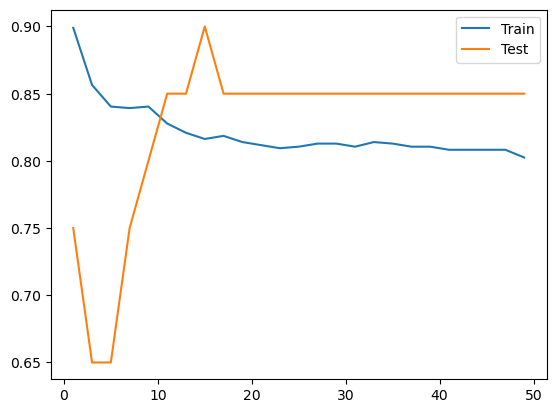

In [40]:
plt.plot(neighbors, train_score, label='Train')
plt.plot(neighbors, test_score, label='Test')
plt.legend()

In [43]:
print(np.max(test_score))
print(neighbors[np.argmax(test_score)])

0.9
15


## Data leakage

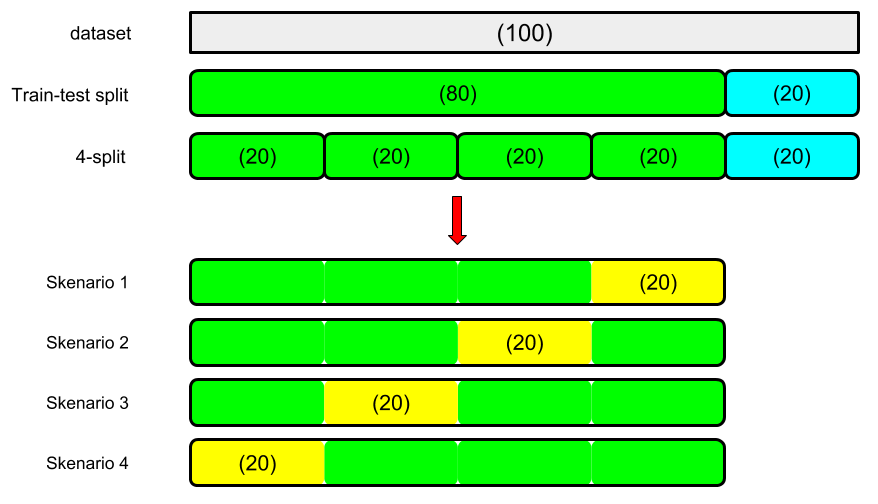

In [44]:
# train-val-test split
illustration.train_val_test

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('titanic.csv', index_col='PassengerId')
columns = ['Name', 'Ticket','Age', 'Cabin']
df.drop(columns=columns, inplace=True)

In [5]:
X = df.drop(columns=['Survived'])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [6]:
# preprocessor pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaller', MinMaxScaler())
    ])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())

])

In [7]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('numeric', num_pipeline, ['SibSp', 'Parch', 'Fare']),
    ('categoric', cat_pipeline, ['Pclass', 'Sex', 'Embarked'])
])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaller',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch', 'Fare']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                  

In [10]:
pipeline.score(X_test, y_test)

0.776536312849162

## Tuning dan GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'algo__n_neighbors':range(1, 51, 2),
    'algo__weights': ['uniform', 'distance'],
    'algo__p':[1, 2]
}
model = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaller',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         Pipeline(step

In [16]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score').head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
40,0.040357,0.001044,0.072041,0.011421,21,1,uniform,"{'algo__n_neighbors': 21, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.810127,0.814606,0.003465,1
36,0.036175,0.002154,0.057767,0.008220,19,1,uniform,"{'algo__n_neighbors': 19, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.805907,0.813200,0.005344,2
24,0.133057,0.035397,0.144143,0.032065,13,1,uniform,"{'algo__n_neighbors': 13, 'algo__p': 1, 'algo_...",0.819328,0.810127,0.810127,0.813194,0.004337,3
28,0.102993,0.027598,0.102392,0.040502,15,1,uniform,"{'algo__n_neighbors': 15, 'algo__p': 1, 'algo_...",0.819328,0.810127,0.810127,0.813194,0.004337,3
38,0.044350,0.006889,0.064201,0.012225,19,2,uniform,"{'algo__n_neighbors': 19, 'algo__p': 2, 'algo_...",0.815126,0.814346,0.805907,0.811793,0.004174,5


In [17]:
model.best_params_

{'algo__n_neighbors': 21, 'algo__p': 1, 'algo__weights': 'uniform'}

In [18]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8174157303370787, 0.7821229050279329)

## predict

In [20]:
data = [
    [1, 'female', 1, 1, 80, 'S'],
    [3, 'male', 0, 0,  5, 'S']
]

X_pred = pd.DataFrame(data, index=['rose', 'jack'], columns=X.columns)
X_pred

,Pclass,Sex,SibSp,Parch,Fare,Embarked
rose,1,female,1,1,80,S
jack,3,male,0,0,5,S


In [23]:
X_pred['Survived'] = model.predict(X_pred)
X_pred

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
rose,1,female,1,1,80,S,1
jack,3,male,0,0,5,S,0


## save model

In [24]:
import pickle

pickle.dump(model, open('knn.pkl', 'wb'))


In [ ]:
pickle.load(open('knn.pkl', 'rb'))